# 1. 原始數據

In [34]:
# import os
# import pymysql
# import pandas as pd

# host = os.getenv('MYSQL_HOST')
# port = os.getenv('MYSQL_PORT')
# user = os.getenv('MYSQL_USER')
# password = os.getenv('MYSQL_PASSWORD')
# database = os.getenv('MYSQL_DATABASE')

# conn = pymysql.connect(
#     host=host,
#     port=int(3306),
#     user="root",
#     passwd=password,
#     db="[cocoa]",
#     charset='utf8mb4')

# df = pd.read_sql_query("SELECT * FROM YOUR_TABLE",
#     conn)
# df.tail(10)

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import time, datetime

# import importlib, sys
# importlib.reload(sys)

# from sqlalchemy import create_engine
# from sqlalchemy.orm import sessionmaker



plt.style.use('ggplot')
# plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.sans-serif'] = ['KaiTi']

plt.rcParams['axes.unicode_minus']=False


In [31]:
df = pd.read_csv('TC_data_277_2021.csv', usecols=["訂單編號", "顧客姓名", "購買次數", "訂單日期", "訂單金額"])


df.head()  # 前五筆
df

,訂單編號,顧客姓名,購買次數,訂單日期,訂單金額
0,1180,張文耀,1,2021/1/2,948
1,1370,羅尹勵,1,2021/1/2,1060
2,1011,邱啓芳,1,2021/1/15,659
3,1012,陳雅雯,1,2021/1/15,2299
4,1013,鄭哲智,1,2021/1/15,659
...,...,...,...,...,...
271,1364,邱秀娥,1,2021/12/23,2360
272,1365,韓劍心,1,2021/12/23,1660
273,1366,陳美玲,1,2021/12/26,1600
274,1367,林世當,1,2021/12/26,1930


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   訂單編號    276 non-null    int64 
 1   顧客姓名    276 non-null    object
 2   購買次數    276 non-null    int64 
 3   訂單日期    276 non-null    object
 4   訂單金額    276 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 10.9+ KB


# 2. 數據清洗

In [33]:
# df.drop()刪除資料
# inplace=True 原始數據也會刪除資料
# df.drop(colums='', inplace=True)
# df.rename(colums={'':'', '':''}, inplace=True)

In [34]:
df.columns

Index(['訂單編號', '顧客姓名', '購買次數', '訂單日期', '訂單金額'], dtype='object')

## 2.1 檢查重複值

In [35]:
# df.duplicated()
df.duplicated().sum()

0

## 2.2 處理缺失值

In [36]:
# df.isnull()
df.isnull().sum()

訂單編號    0
顧客姓名    0
購買次數    0
訂單日期    0
訂單金額    0
dtype: int64

## 2.3 數據格式-標準化處理

In [37]:
df.訂單日期 = pd.to_datetime(df.訂單日期,format='%Y/%m/%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   訂單編號    276 non-null    int64         
 1   顧客姓名    276 non-null    object        
 2   購買次數    276 non-null    int64         
 3   訂單日期    276 non-null    datetime64[ns]
 4   訂單金額    276 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 10.9+ KB


## 2.4 異常值處理

In [38]:
df[['購買次數' ,'訂單金額']].describe()

,購買次數,訂單金額
count,276.000000,276.000000
mean,1.159420,1801.923913
std,0.422053,1151.096532
min,1.000000,460.000000
25%,1.000000,1060.000000
50%,1.000000,1581.000000
75%,1.000000,2260.000000
max,3.000000,10600.000000


# 3. 分析階段

## 1. 消費情況按月分析
### 每月消費總金額趨勢分析

In [39]:
df['Month']=df.訂單日期.astype('datetime64[M]')
# df.head()
df

,訂單編號,顧客姓名,購買次數,訂單日期,訂單金額,Month
0,1180,張文耀,1,2021-01-02,948,2021-01-01
1,1370,羅尹勵,1,2021-01-02,1060,2021-01-01
2,1011,邱啓芳,1,2021-01-15,659,2021-01-01
3,1012,陳雅雯,1,2021-01-15,2299,2021-01-01
4,1013,鄭哲智,1,2021-01-15,659,2021-01-01
...,...,...,...,...,...,...
271,1364,邱秀娥,1,2021-12-23,2360,2021-12-01
272,1365,韓劍心,1,2021-12-23,1660,2021-12-01
273,1366,陳美玲,1,2021-12-26,1600,2021-12-01
274,1367,林世當,1,2021-12-26,1930,2021-12-01


In [40]:
grouped_month = df.groupby('Month')

In [41]:
grouped_month.訂單金額.sum()

Month
2021-01-01    208712
2021-02-01    124959
2021-03-01     18518
2021-04-01      8170
2021-05-01     12836
2021-06-01     16927
2021-07-01     33700
2021-08-01     23130
2021-09-01      4040
2021-10-01     14360
2021-11-01     13579
2021-12-01     18400
Name: 訂單金額, dtype: int64

### 每月訂單金額折線圖

<AxesSubplot:xlabel='Month'>

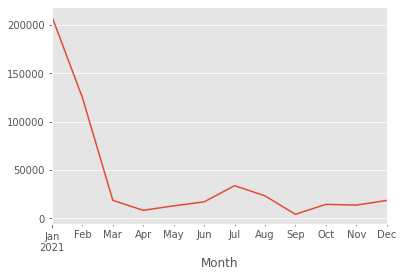

In [42]:
grouped_month.訂單金額.sum().plot()

### 每月訂單數量折線圖

<AxesSubplot:xlabel='Month'>

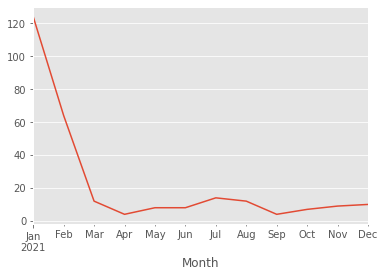

In [43]:
grouped_month.訂單編號.nunique().head(12).plot()

### 用戶分佈分析

<AxesSubplot:>

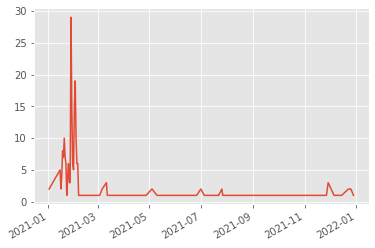

In [44]:
df.groupby('顧客姓名').訂單日期.min().value_counts().plot()

### 新用戶每月人數

<AxesSubplot:>

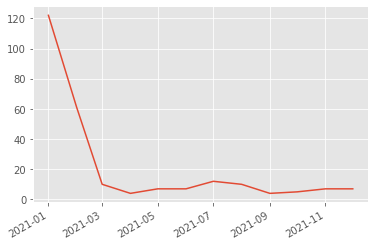

In [45]:
df.groupby('顧客姓名').Month.min().value_counts().plot()

# 4. 用戶分層分析

## RFM分層分析
### Recency（上次消費的日期）、Frequency（消費頻率）、Monetary（消費金額）
- Recency（上次消費的日期）近期有消費過的顧客，會是最有可能再次回購的人，因此可以針對這群人發放折價優惠或是商品訊息。
- Frequency（消費頻率）
消費頻率越高的人就越有可能是品牌的忠誠顧客，也因此可以透過行銷策略，持續提高這群人的購買意願。
- Monetary（消費金額）
消費金額的多寡過去常被視為較重要的要素，但是結合 Recency、Frequency 就會是一個完整的顧客消費輪廓。
未來若是要採用分眾行銷，RFM 模型就會是個參考依據。

In [46]:
pivot_rfm = df.pivot_table(index='顧客姓名',
                          values=['訂單日期', '購買次數', '訂單金額'],
                          aggfunc={'訂單日期':'max' , '購買次數':'nunique', '訂單金額':'sum'})

In [47]:
pivot_rfm['R'] = (pivot_rfm.訂單日期.max() - pivot_rfm.訂單日期)/np.timedelta64(1, 'D')
pivot_rfm.rename(columns={'購買次數':'F', '訂單金額':'M'}, inplace=True)

In [48]:
#根據分數評定不同的級別，這裡分數和分數的平均數對比
#定義函式
def label_func(df):
    label = df.apply(lambda x:'1' if x > 0 else '0')
    label = label.R + label.F + label.M
    labels = {
        '111':'重要價值客戶important value',
        '011':'重要保持客戶important keep',
        '101':'重要發展客戶important develop',
        '001':'重要挽留客戶important retain',
        '110':'一般價值客戶generally value',
        '010':'一般保持客戶generally keep',
        '100':'一般發展客戶generally develop',
        '000':'一般挽留客戶generally retain'
    }
    return labels[label]
pivot_rfm['label'] = pivot_rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(label_func, axis=1)

<AxesSubplot:>

/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23637 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23458 missing from current font.
  font.set_text(s, 0.0, flags=fl

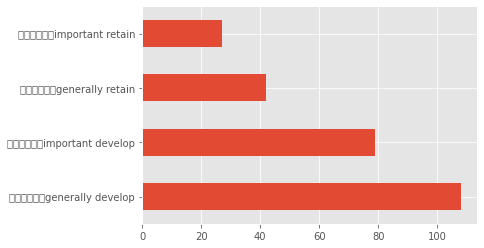

In [49]:
pivot_rfm.label.value_counts().plot.barh()

## 客戶分層消費金額占比

<AxesSubplot:ylabel='M'>

/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25405 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23458 missing from current font.
  font.set_text(s, 0.0, flags=fl

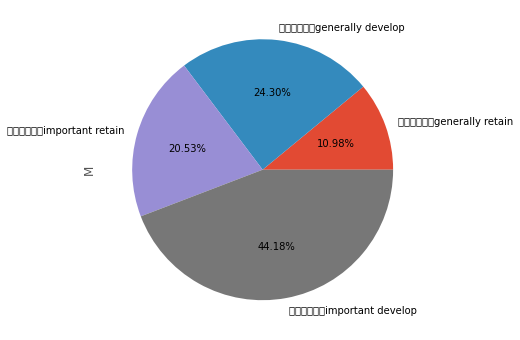

In [50]:
pivot_rfm.groupby('label').M.sum().plot.pie(figsize=(6,6), autopct='%3.2f%%')

In [51]:
pivot_rfm.groupby('label').agg(['sum','count'])

M          F              R      
                            sum count  sum count      sum count
label                                                          
一般挽留客戶generally retain    54618    42   42    42   5276.0    42
一般發展客戶generally develop  120872   108  108   108  36112.0   108
重要挽留客戶important retain   102112    27   27    27   3666.0    27
重要發展客戶important develop  219729    79   79    79  26247.0    79

銷售額主要來源為重要發展客戶,人數佔比最高的為一般發展客戶

重要保持客戶:
重要價值客戶:
重要發展客戶:銷售額的主要來源,人數佔比次高,近期有消費,且消費高,消費頻率不足,可以適當舉行營銷活動,提升此層客戶的購買頻率
重要挽留客戶:銷售額次高,但頻次低目近期末消費,處在流失的邊緣,可以通過適當活動,使其參與到消費中來,防止流失
一般價值客戶:
一般發展客戶:人數佔比最高,近期有消費,但消費額以及消費頻次不高考慮到人教佔比高,可以話當舉辦活動提升消費頻次和消費額
一般保持客戶:
一般挽留客戶:在成本與資源控制下,酌情考慮

## 用戶狀態分層分析

In [52]:
pivoted_status = df.pivot_table(index='顧客姓名', columns='Month', values='訂單日期', aggfunc='count').fillna(0)

In [53]:
def active_status(df):
    status = []
    for i in range(len(df)):
        # 若本月沒消費
        if df[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        # 若本月有消費
        else:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('new')
                elif status[i-1] == 'unactive':
                    status.append('return')
                else:
                    status.append('active')
            else:
                status.append('new')
    status = pd.Series(status, index = df.index)
    return status

In [54]:
active_status = pivoted_status.apply(active_status, axis=1)

<AxesSubplot:xlabel='Month'>

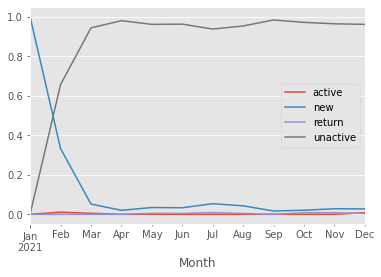

In [55]:
active_status.replace('unreg', np.nan).apply(lambda x:x.value_counts()).fillna(0).T.apply(lambda x:x/x.sum(),axis=1).plot()

- 新用戶(藍)：新用戶佔比呈明顯下降趨勢,說明拉新客戶行銷不足
- 活躍用戶(橘)：消費運營持續低落,說明消費營運持續下滑
- 不活躍用戶(灰)：不活躍用戶呈明顯上升趨勢,客戶流失較為明顯
- 回流客戶(紫)：消費運營持續低落,說明召回營運效果不佳